## S11 T01: Classifica els diferents vols

### Exercici 1

Classifica els diferents vols utilitzant l'algorisme de K-means.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/Users/Diana/Downloads/archive/DelayedFlights.csv')

In [3]:
df=df.drop_duplicates()

In [4]:
df.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [5]:
#dropping the columns that don't add relevant information
df=df.drop(['Unnamed: 0', 'Year','FlightNum','Cancelled','CancellationCode','Diverted','DepTime','CRSDepTime','ArrTime','CRSArrTime','TailNum','ActualElapsedTime','CRSElapsedTime','TaxiIn','TaxiOut'], axis=1)

In [6]:
#checking null values

df.isnull().sum()

Month                     0
DayofMonth                0
DayOfWeek                 0
UniqueCarrier             0
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [7]:
#fill null values with 0

df.fillna(0, inplace=True)

In [8]:
df.isnull().sum()

Month                0
DayofMonth           0
DayOfWeek            0
UniqueCarrier        0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

In [9]:
#selecting a sample

df=df.sample(5000, random_state=42)

In [10]:
df.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'AirTime',
       'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [11]:
#standardizing data for better algorism functionality

airlines_scaled=df.loc[:,['UniqueCarrier', 'Origin', 'Dest','Month', 'DayofMonth', 'DayOfWeek','AirTime',
       'ArrDelay', 'DepDelay', 'Distance', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']]

airlines_scaled

,UniqueCarrier,Origin,Dest,Month,DayofMonth,DayOfWeek,AirTime,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1782417,YV,IAD,AUS,12,6,6,177.0,71.0,10.0,1297,71.0,0.0,0.0,0.0,0.0
512712,NW,ORD,MSP,3,23,7,55.0,548.0,560.0,334,543.0,0.0,0.0,0.0,5.0
447137,OO,SLC,PIH,3,31,1,44.0,9.0,21.0,150,0.0,0.0,0.0,0.0,0.0
55082,OO,HDN,DEN,1,6,7,32.0,52.0,54.0,142,0.0,0.0,0.0,0.0,52.0
877634,CO,JAX,IAH,5,22,4,134.0,22.0,7.0,817,0.0,0.0,15.0,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982354,US,TPA,PHL,6,29,7,143.0,16.0,6.0,920,6.0,0.0,10.0,0.0,0.0
1433275,WN,SAN,OAK,9,11,4,65.0,5.0,6.0,446,0.0,0.0,0.0,0.0,0.0
1115187,XE,EWR,RDU,7,26,6,61.0,38.0,41.0,416,2.0,0.0,0.0,0.0,36.0
48890,OH,PHL,BOS,1,15,2,52.0,139.0,125.0,280,0.0,125.0,14.0,0.0,0.0


In [12]:
from sklearn.preprocessing import StandardScaler

#initialize the scaler

scaler=StandardScaler()

In [13]:
#identify the numeric variables to be scaled. In this case, the last 12 columns contain numeric variables to scale

numeric=airlines_scaled.columns[-12:]

# fit the data using the scaler
airlines_scaled[numeric]= scaler.fit_transform(airlines_scaled[numeric])
airlines_scaled.head()

,UniqueCarrier,Origin,Dest,Month,DayofMonth,DayOfWeek,AirTime,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1782417,YV,IAD,AUS,1.727977,-1.107410,1.018070,1.029363,0.543296,-0.629974,0.953376,1.863956,-0.131411,-0.345336,-0.048561,-0.437542
512712,NW,ORD,MSP,-0.892199,0.837824,1.519484,-0.782232,9.225569,10.126170,-0.768350,16.705970,-0.131411,-0.345336,-0.048561,-0.293814
447137,OO,SLC,PIH,-0.892199,1.753228,-1.488998,-0.945573,-0.585218,-0.414851,-1.097319,-0.368635,-0.131411,-0.345336,-0.048561,-0.437542
55082,OO,HDN,DEN,-1.474460,-1.107410,1.519484,-1.123762,0.197461,0.230518,-1.111623,-0.368635,-0.131411,-0.345336,-0.048561,1.057227
877634,CO,JAX,IAH,-0.309938,0.723398,0.015243,0.390850,-0.348594,-0.688644,0.095195,-0.368635,-0.131411,0.165184,5.197275,-0.437542


In [14]:
#KMeans estimator class and set the algorithm parameters before fitting the estimator to the data
#This will perform ten runs of the k-means algorithm on the data data with a maximum of 300 iterations per run

kmeans=KMeans(
       init="random",
       n_clusters=3,
       n_init=10,
       max_iter=300,
       random_state=42)

In [15]:
kmeans.fit(airlines_scaled[numeric])

KMeans(init='random', n_clusters=3, random_state=42)

In [16]:
#The lowest SSE value
kmeans.inertia_

45359.04091148923

In [17]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[ 6.67853739e-02,  8.30729326e-02, -6.29775649e-02,
        -1.48530031e-01,  2.30850906e+00,  2.26385935e+00,
        -2.06709750e-01,  9.69535731e-01,  6.15428104e-01,
         1.20323969e+00, -4.85614565e-02,  1.43022921e+00],
       [-1.77802567e-03, -2.08182380e-02,  2.03191570e-02,
         1.66956348e+00, -2.16636027e-01, -2.16644718e-01,
         1.68841491e+00, -1.02679768e-01, -6.54878461e-02,
        -5.15430231e-02,  5.09096490e-02, -1.43457664e-01],
       [-8.80975412e-03, -6.37747237e-03,  3.71782106e-03,
        -3.90467161e-01, -2.66315454e-01, -2.60130855e-01,
        -3.87052335e-01, -1.08968583e-01, -6.90931478e-02,
        -1.53918056e-01, -5.80945713e-03, -1.62719674e-01]])

In [18]:
# The number of iterations required to converge
kmeans.n_iter_

12

In [19]:
#check the 10 first predicted labels
kmeans.labels_[:10]

array([1, 0, 2, 2, 2, 1, 2, 1, 2, 2], dtype=int32)

In [20]:
#with "collections" module we can check the number of observations by cluster

import collections

In [21]:
counter=collections.Counter(kmeans.labels_)
counter

Counter({1: 889, 0: 500, 2: 3611})

In [22]:
#Choosing the appropriate Number of Clusters. I will try first the "Elbow" method

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42}

In [23]:
#A list holds the SSE values for each k
sse=[]
for k in range(1, 11):
   kmeans=KMeans(n_clusters=k, **kmeans_kwargs)
   kmeans.fit(airlines_scaled[numeric])
   sse.append(kmeans.inertia_)

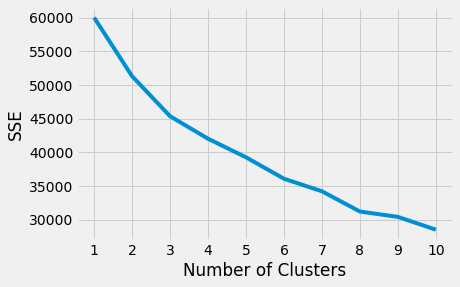

In [24]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Even though the curve is smoothed we can appreciate that the elbow is located at x=3.

In [25]:
#But let's check the elbow point with Knedd module

kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing")

kl.elbow

3

In [26]:
#I will use now the silhouette coefficient which is a measure of cluster cohesion and separation

#A list holds the silhouette coefficients for each k
silhouette_coefficients=[]
   
for k in range(2, 11):
    kmeans=KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(airlines_scaled[numeric])
    score=silhouette_score(airlines_scaled[numeric], kmeans.labels_)
    silhouette_coefficients.append(score)

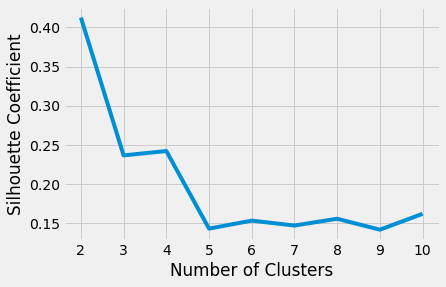

In [27]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Silhouette coefficient suggests that the adequate number of clusters is 2.

In [29]:
silhouette_coefficients

[0.4123710740150198,
 0.23673779175688342,
 0.24229584908140295,
 0.1434045895378074,
 0.15355283759527932,
 0.14731443409733838,
 0.15596088117228668,
 0.14201318065088622,
 0.1622591543619203]

### Exercici 2 i Exercici 3

Classifica els diferents vols utilitzant l'algorisme de clustering jeràrquic.

Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

**Hierarchical clustering** algorithms group similar objects into groups called clusters. 

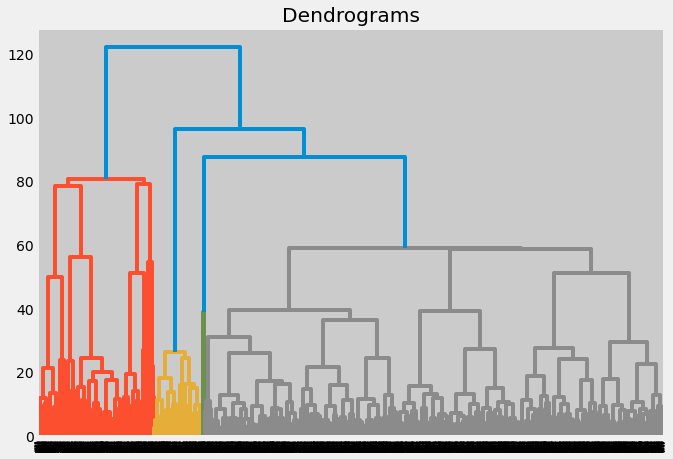

In [30]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend=shc.dendrogram(shc.linkage(airlines_scaled[numeric], method='ward'))

The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence we can decide a threshold of 60 and cut the dendrogram:

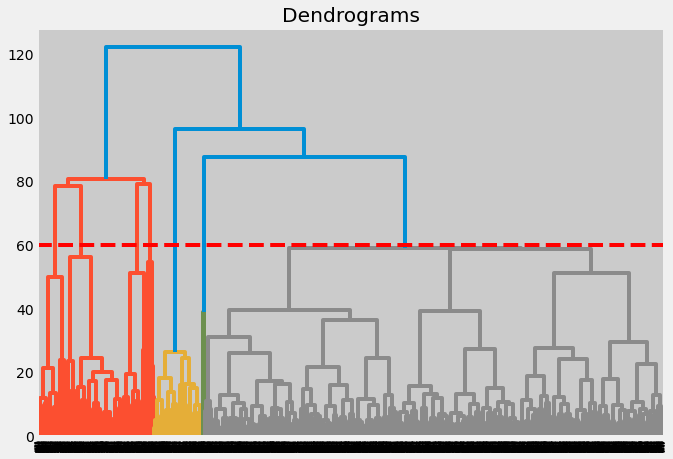

In [31]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(airlines_scaled[numeric], method='ward'))
plt.axhline(y=60, color='r', linestyle='--')

We have two clusters as this line cuts the dendrogram at two points. Let’s now apply hierarchical clustering for 2 clusters:

In [32]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(airlines_scaled[numeric])

array([0, 1, 0, ..., 0, 1, 0])

We can see the values of 0s and 1s in the output since we defined 2 clusters. 0 represents the points that belong to the first cluster and 1 represents points in the second cluster. Let’s now visualize the two clusters:

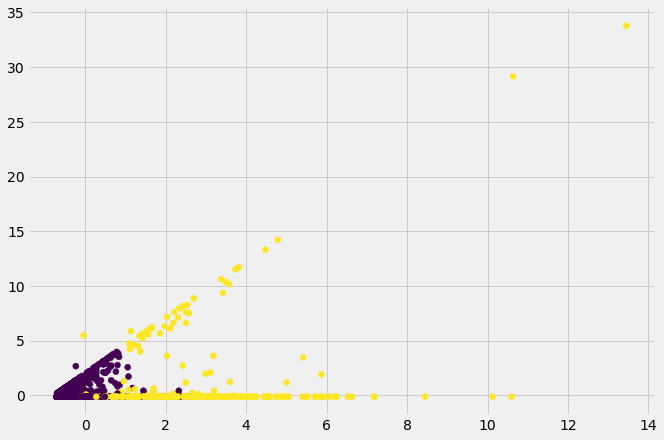

In [50]:
plt.figure(figsize=(10, 7))  
plt.scatter(airlines_scaled[numeric]['DepDelay'], airlines_scaled[numeric]['WeatherDelay'], c=cluster.labels_) 

In [51]:
#get the Silhouette score

kmeans_silhouette=silhouette_score(
      airlines_scaled[numeric], kmeans.labels_
    ).round(2)

In [52]:
kmeans_silhouette

0.16

Silouette coefficient is very low suggesting that clusters are overlapping.

In [36]:
#let's apply the model with PCA analysis

from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
pca=PCA(n_components=2)

In [37]:
X_principal=pca.fit_transform(airlines_scaled[numeric])
X_principal=pd.DataFrame(X_principal)
X_principal.columns=['P1', 'P2']

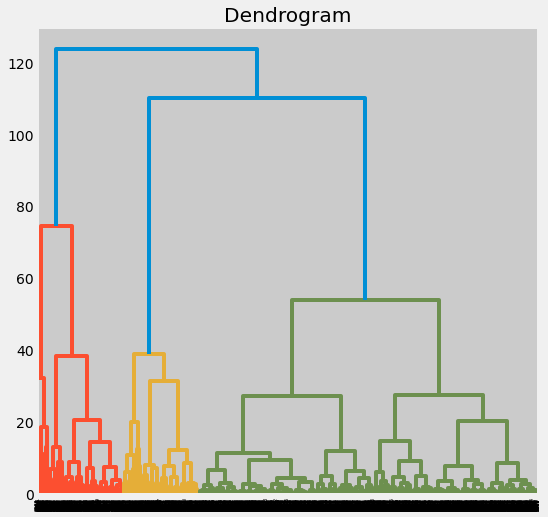

In [38]:
plt.figure(figsize =(8, 8))
plt.title('Dendrogram')
Dendrogram=sch.dendrogram((sch.linkage(X_principal, method='ward')))

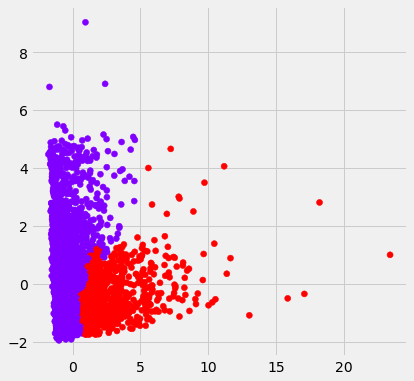

In [39]:
#Visualize the different number of clusters

ac2=AgglomerativeClustering(n_clusters=2)
  
# Visualizing the clustering
plt.figure(figsize=(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c=ac2.fit_predict(X_principal), cmap='rainbow')
plt.show()

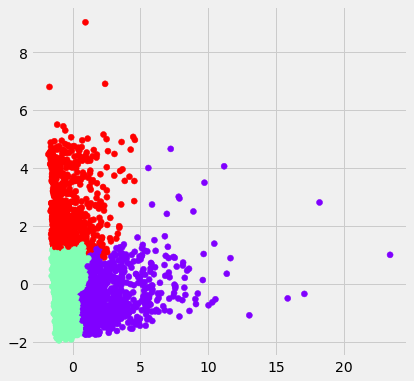

In [40]:
k=3

ac3=AgglomerativeClustering(n_clusters = 3)
  
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
           c=ac3.fit_predict(X_principal), cmap='rainbow')
plt.show()

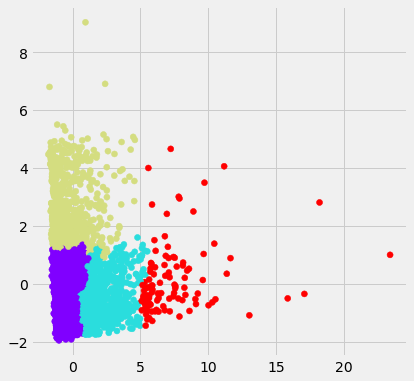

In [41]:
k=4

ac4=AgglomerativeClustering(n_clusters = 4)
  
plt.figure(figsize=(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
            c=ac4.fit_predict(X_principal), cmap='rainbow')
plt.show()

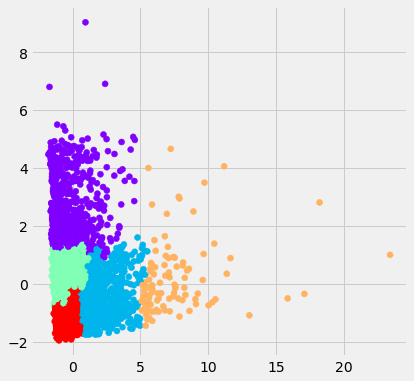

In [42]:
k=5

ac5=AgglomerativeClustering(n_clusters=5)
  
plt.figure(figsize=(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
            c=ac5.fit_predict(X_principal), cmap='rainbow')
plt.show()

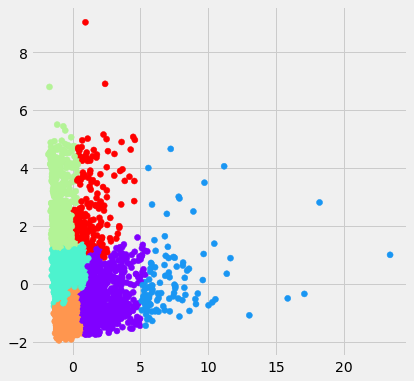

In [43]:
k=6

ac6=AgglomerativeClustering(n_clusters=6)
  
plt.figure(figsize=(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
            c=ac6.fit_predict(X_principal), cmap='rainbow')
plt.show()

It seems that k=3 is the optimal clustering option as the thickness is more uniform than other clustering options.

In [44]:
#we'll evaluate each clustering with Silhouette:

k=[2, 3, 4, 5, 6]

silhouette_scores=[]
silhouette_scores.append(
        silhouette_score(X_principal, ac2.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac3.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac4.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac5.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac6.fit_predict(X_principal)))  

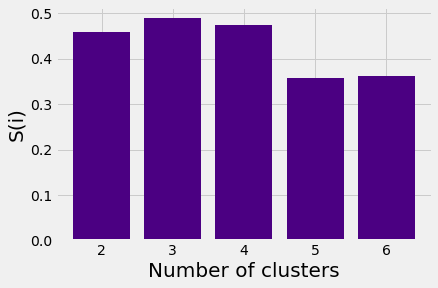

In [54]:
#visualize each score to evaluate which is the best

plt.bar(k, silhouette_scores, color='indigo')
plt.xlabel('Number of clusters', fontsize=20)
plt.ylabel('S(i)', fontsize=20)
plt.show()

In [46]:
print(silhouette_scores)

[0.4581416166822757, 0.48960151056397755, 0.4748107042611806, 0.35690762167081336, 0.36309568811809945]


Clearly k=3 is the best value.